# Laptop Analysis Project 

## By Group - 4

<h2> Business Problem </h2>
<p>Predicting the price of laptop<p>
    

Source- Scraped the data of laptops from e-commerce sites
    
<h2>Machine Leaning Problem</h2>

It is a Regresion problem, for a given columns we need to predict the price of laptop.

<h2> Performance Metric</h2>

1. R2 Score

2. Mean Absolute Error

3. RMSE


## Data Processing Steps

1. **Load the Dataset**

 

In [24]:
import pandas as pd 
import numpy as np


In [25]:
df = pd.read_csv("D:\\SEM 5\\BDA\\Laptop Analysis Project\\cleaned_file.csv")
df.tail()

,Brand,Model,Processor,Generation,Operating System,RAM,Storage,Size,Warranty,Color,Star Rating,No. of Ratings,No. of Reviews,Price
8905,MSI,MSI Modern,Intel Core i5,13th Gen,Windows 11 Operating System,16 GB,512,39.62,2,Silver,4.3,1963,284,44990
8906,DELL,DELL Inspiron,Intel Core i3,12th Gen,Windows 11 Operating System,8 GB,512,39.62,1,Blue,4.2,1630,300,42490
8907,MSI,MSI Thin,AMD Ryzen 5,11th Gen,Windows 11 Operating System,8 GB,512,39.62,2,Black,4.3,1689,233,47990
8908,MSI,MSI Modern,Intel Core i5,12th Gen,Windows 11 Operating System,8 GB,512,35.56,1,Blue,4.3,764,112,36990
8909,Lenovo,Lenovo IdeaPad Slim,Intel Core i5,12th Gen,Windows 11 Operating System,16 GB,512,100.63,2,Black,4.2,463,286,36990


<h1>Data Cleaning</h1>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8910 entries, 0 to 8909
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             8910 non-null   object 
 1   Model             8910 non-null   object 
 2   Processor         8910 non-null   object 
 3   Generation        8910 non-null   object 
 4   Operating System  8910 non-null   object 
 5   RAM               8910 non-null   object 
 6   Storage           8910 non-null   int64  
 7   Size              8910 non-null   float64
 8   Warranty          8910 non-null   int64  
 9   Color             8910 non-null   object 
 10  Star Rating       8910 non-null   float64
 11  No. of Ratings    8910 non-null   int64  
 12  No. of Reviews    8910 non-null   int64  
 13  Price             8910 non-null   int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 974.7+ KB


In [27]:
df.shape

(8910, 14)

In [28]:
df.isnull().sum()

Brand               0
Model               0
Processor           0
Generation          0
Operating System    0
RAM                 0
Storage             0
Size                0
Warranty            0
Color               0
Star Rating         0
No. of Ratings      0
No. of Reviews      0
Price               0
dtype: int64

In [29]:
df.duplicated().sum()

0

In [30]:
df['Size'].value_counts()

39.62     5035
35.56     2471
34.54      458
40.64      392
100.63     201
100.58     194
40.89      140
43.94       19
Name: Size, dtype: int64

In [31]:
df['Operating System'].value_counts()

Windows 11 Operating System           7172
64 bit Windows 11 Operating System    1087
Mac OS Operating System                458
Windows 11 Home Operating System       193
Name: Operating System, dtype: int64

In [32]:
df['RAM'].value_counts()

16 GB    4998
8 GB     3767
24 GB     145
Name: RAM, dtype: int64

In [33]:
df['Storage'].value_counts()

512    7806
1       646
256     458
Name: Storage, dtype: int64

In [34]:
df['Storage'] = df['Storage'].replace(1, 1024)
print(df['Storage'].value_counts())

512     7806
1024     646
256      458
Name: Storage, dtype: int64


In [35]:
df.shape

(8910, 14)

In [36]:
# Remove the 'GB' part and convert to integer
df['RAM'] = df['RAM'].str.replace('GB', '').astype(int)

# Verify the changes
print(df['RAM'].value_counts())


16    4998
8     3767
24     145
Name: RAM, dtype: int64


In [37]:
# Remove rows where RAM is 24
df = df[df['RAM'] != 24]

# Verify the changes
print(df['RAM'].value_counts())


16    4998
8     3767
Name: RAM, dtype: int64


In [38]:
df.shape

(8765, 14)

In [39]:
df['Processor'].value_counts()

Intel Core i5         4586
Intel Core i3         2045
AMD Ryzen 5            779
Intel Core i7          713
AMD Ryzen 7            258
AMD Ryzen 3            192
Intel Celeron Dual     192
Name: Processor, dtype: int64

In [40]:
df['Generation'].value_counts()

12th Gen    5831
13th Gen    1545
11th Gen    1001
14th Gen     195
10th Gen     193
Name: Generation, dtype: int64

<h2>Exploratory Data Analysis  </h2>

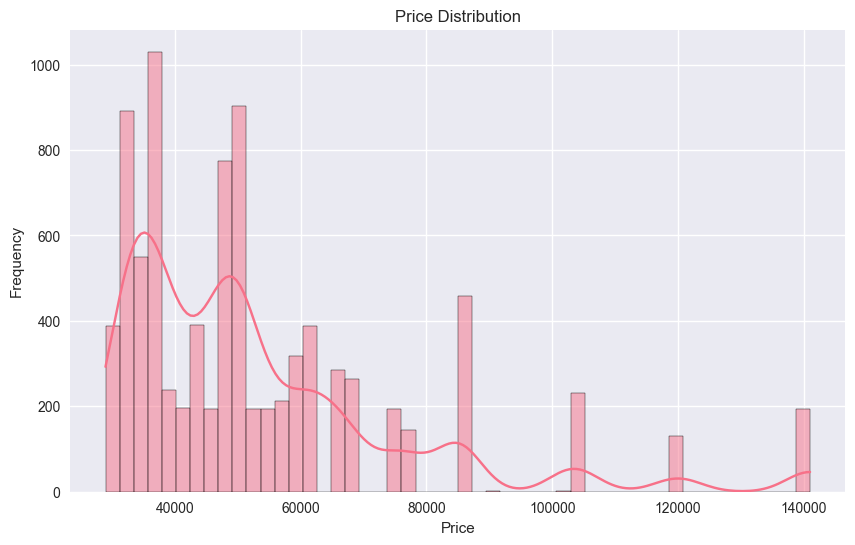

In [41]:


import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


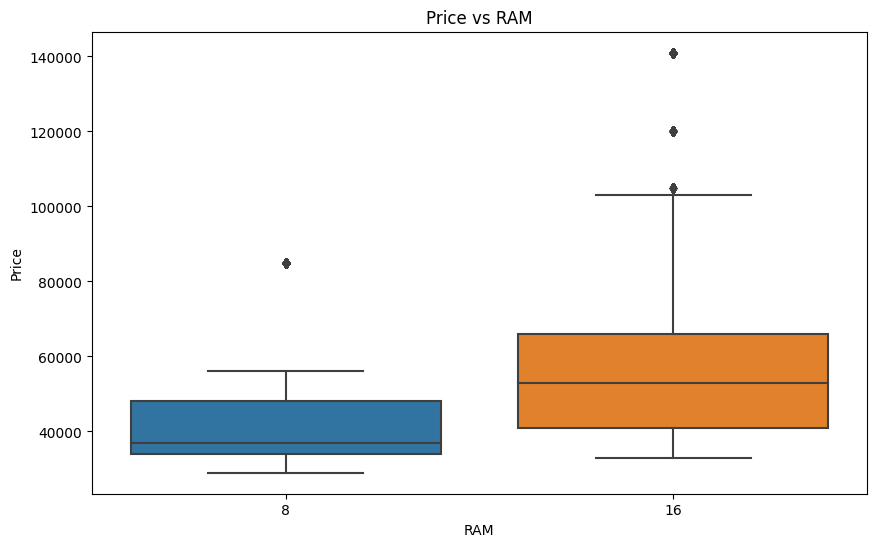

In [369]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RAM', y='Price', data=df)
plt.title('Price vs RAM')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.show()


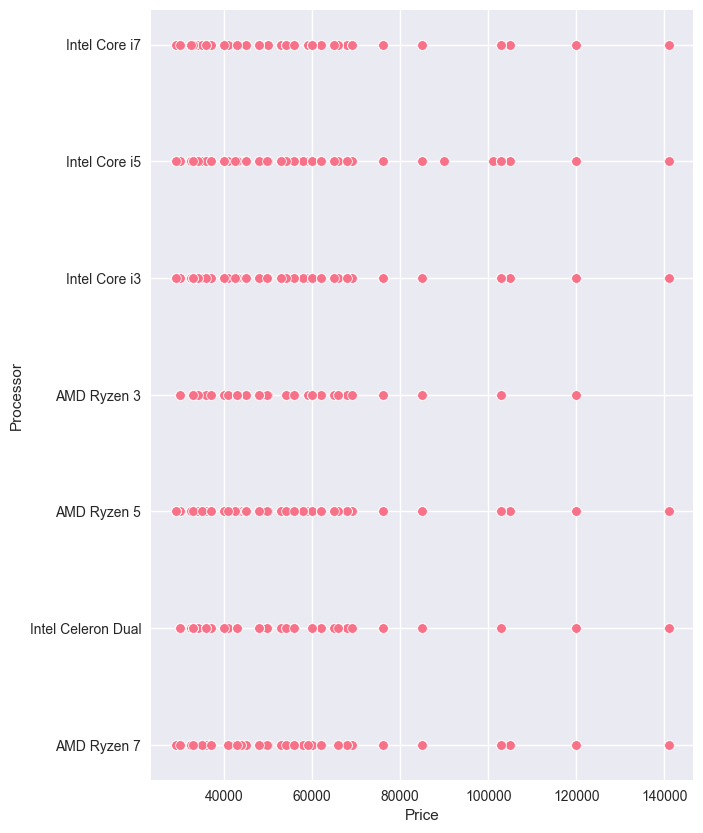

In [42]:
plt.figure(figsize=(7,10)) 
sns.scatterplot(df, x='Price', y='Processor')
plt.show()

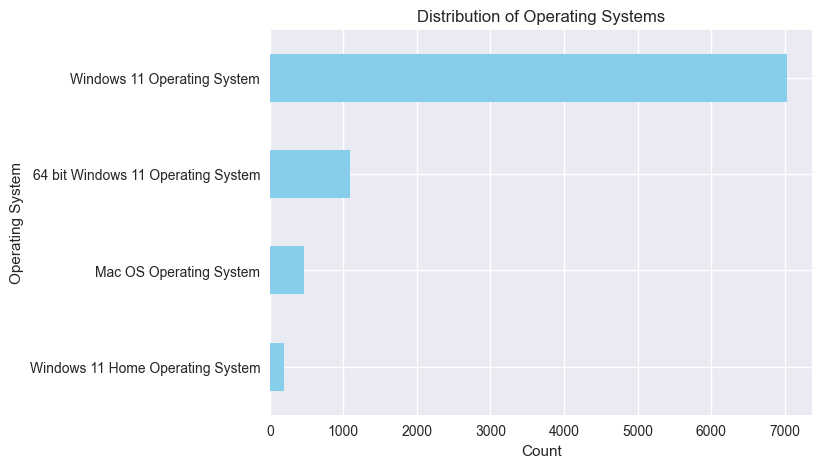

In [43]:
# Replace 'Win 10' with 'Windows 10' to standardize the OS names
df['Operating System'] = df['Operating System'].replace('Win 10', 'Windows 10')

# Create the plot again
plt.figure(figsize=(7,5))
df.groupby('Operating System').size().sort_values().plot.barh(color='skyblue')
plt.title('Distribution of Operating Systems')
plt.xlabel('Count')
plt.ylabel('Operating System')
plt.show()

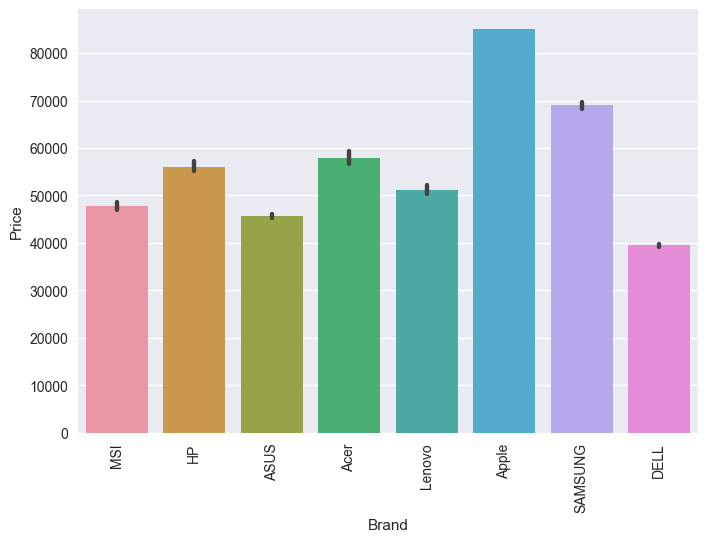

In [44]:

sns.barplot(x=df['Brand'], y=df['Price'])

plt.xticks(rotation="vertical")

plt.show()
 

<h2> Removing Outliers </h2>

In [45]:
# Calculate IQR (Interquartile Range)
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to remove outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the Price column using the IQR method
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

# Check the shape and info of the cleaned DataFrame
print(df.shape)
df.info()


(8210, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8210 entries, 1 to 8909
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             8210 non-null   object 
 1   Model             8210 non-null   object 
 2   Processor         8210 non-null   object 
 3   Generation        8210 non-null   object 
 4   Operating System  8210 non-null   object 
 5   RAM               8210 non-null   int32  
 6   Storage           8210 non-null   int64  
 7   Size              8210 non-null   float64
 8   Warranty          8210 non-null   int64  
 9   Color             8210 non-null   object 
 10  Star Rating       8210 non-null   float64
 11  No. of Ratings    8210 non-null   int64  
 12  No. of Reviews    8210 non-null   int64  
 13  Price             8210 non-null   int64  
dtypes: float64(2), int32(1), int64(5), object(6)
memory usage: 930.0+ KB


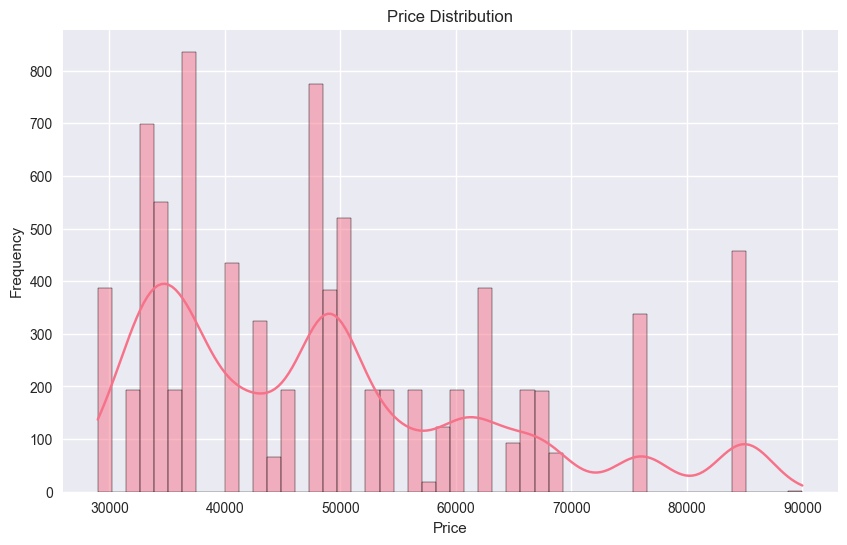

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


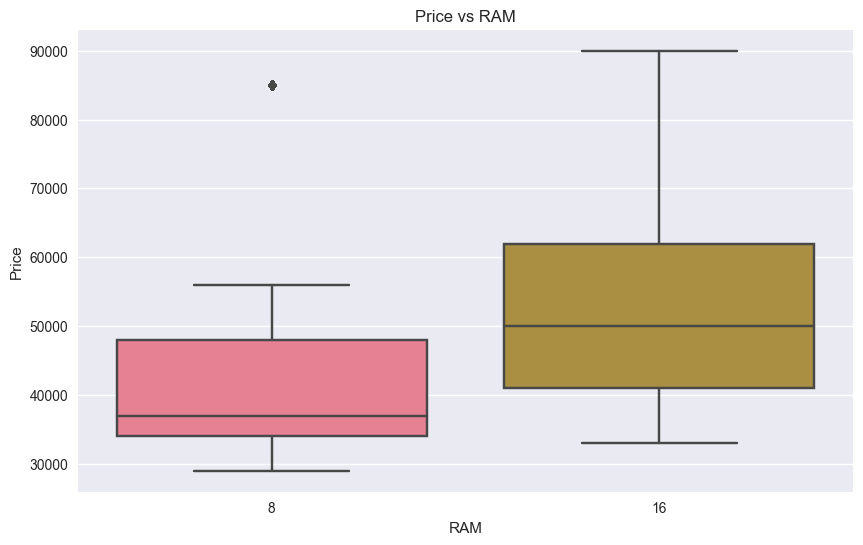

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RAM', y='Price', data=df)
plt.title('Price vs RAM')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.show()


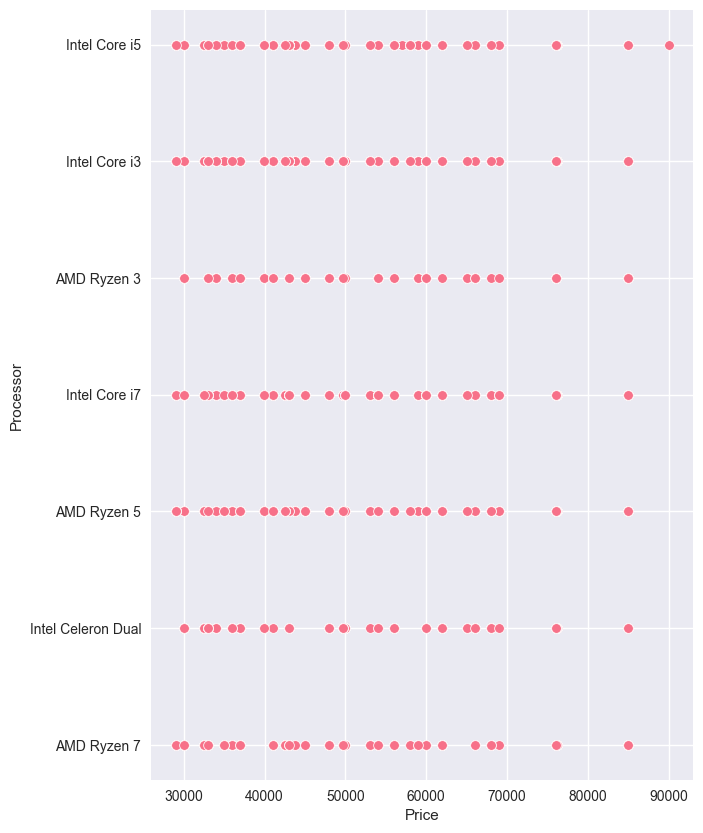

In [48]:
plt.figure(figsize=(7,10)) 
sns.scatterplot(df, x='Price', y='Processor')
plt.show()

In [49]:
df


,Brand,Model,Processor,Generation,Operating System,RAM,Storage,Size,Warranty,Color,Star Rating,No. of Ratings,No. of Reviews,Price
1,MSI,MSI Thin,Intel Core i5,12th Gen,Windows 11 Operating System,16,512,39.62,2,Grey,4.3,1709,125,49990
2,HP,HP Intel Core i,Intel Core i5,12th Gen,Windows 11 Operating System,16,512,39.62,2,Blue,4.2,1110,126,53990
3,ASUS,ASUS Vivobook,Intel Core i3,12th Gen,Windows 11 Operating System,8,512,39.62,2,Blue,4.3,1544,289,36990
4,Acer,Acer Aspire,Intel Core i3,12th Gen,64 bit Windows 11 Operating System,8,512,35.56,1,Silver,4.2,1380,182,29990
5,Lenovo,Lenovo IdeaPad Slim,Intel Core i5,12th Gen,Windows 11 Operating System,16,512,35.56,1,Metallic Black,4.1,1345,227,49690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,MSI,MSI Modern,Intel Core i5,13th Gen,Windows 11 Operating System,16,512,39.62,2,Silver,4.3,1963,284,44990
8906,DELL,DELL Inspiron,Intel Core i3,12th Gen,Windows 11 Operating System,8,512,39.62,1,Blue,4.2,1630,300,42490
8907,MSI,MSI Thin,AMD Ryzen 5,11th Gen,Windows 11 Operating System,8,512,39.62,2,Black,4.3,1689,233,47990
8908,MSI,MSI Modern,Intel Core i5,12th Gen,Windows 11 Operating System,8,512,35.56,1,Blue,4.3,764,112,36990


In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8210 entries, 1 to 8909
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             8210 non-null   object 
 1   Model             8210 non-null   object 
 2   Processor         8210 non-null   object 
 3   Generation        8210 non-null   object 
 4   Operating System  8210 non-null   object 
 5   RAM               8210 non-null   int32  
 6   Storage           8210 non-null   int64  
 7   Size              8210 non-null   float64
 8   Warranty          8210 non-null   int64  
 9   Color             8210 non-null   object 
 10  Star Rating       8210 non-null   float64
 11  No. of Ratings    8210 non-null   int64  
 12  No. of Reviews    8210 non-null   int64  
 13  Price             8210 non-null   int64  
dtypes: float64(2), int32(1), int64(5), object(6)
memory usage: 930.0+ KB


<h2> Feature Engineering </h2>

In [329]:
# One-hot encode the Processor column
df = pd.get_dummies(df, columns=['Processor'], drop_first=True)



In [330]:
# One-hot encode the Processor column
df = pd.get_dummies(df, columns=['Operating System'], drop_first=True)


In [331]:

# Extract numeric generation information (e.g., '12', '13', etc.)
df['Generation'] = df['Generation'].str.extract(r'(\d+)', expand=False).astype(int)

# Now check the processed 'Generation' column
df['Generation'].value_counts()


12    5477
13    1421
11     946
10     187
14     179
Name: Generation, dtype: int64

In [332]:
# Perform One-Hot Encoding on the 'Color' column
df = pd.get_dummies(df, columns=['Color'], drop_first=True)

In [333]:
# Perform One-Hot Encoding on the 'Brand' column
df = pd.get_dummies(df, columns=['Brand'], drop_first=True)

In [334]:
df

,Model,Generation,RAM,Storage,Size,Warranty,Star Rating,No. of Ratings,No. of Reviews,Price,...,Color_Grey,Color_Metallic Black,Color_Silver,Brand_Acer,Brand_Apple,Brand_DELL,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_SAMSUNG
1,MSI Thin,12,16,512,39.62,2,4.3,1709,125,49990,...,1,0,0,0,0,0,0,0,1,0
2,HP Intel Core i,12,16,512,39.62,2,4.2,1110,126,53990,...,0,0,0,0,0,0,1,0,0,0
3,ASUS Vivobook,12,8,512,39.62,2,4.3,1544,289,36990,...,0,0,0,0,0,0,0,0,0,0
4,Acer Aspire,12,8,512,35.56,1,4.2,1380,182,29990,...,0,0,1,1,0,0,0,0,0,0
5,Lenovo IdeaPad Slim,12,16,512,35.56,1,4.1,1345,227,49690,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,MSI Modern,13,16,512,39.62,2,4.3,1963,284,44990,...,0,0,1,0,0,0,0,0,1,0
8906,DELL Inspiron,12,8,512,39.62,1,4.2,1630,300,42490,...,0,0,0,0,0,1,0,0,0,0
8907,MSI Thin,11,8,512,39.62,2,4.3,1689,233,47990,...,0,0,0,0,0,0,0,0,1,0
8908,MSI Modern,12,8,512,35.56,1,4.3,764,112,36990,...,0,0,0,0,0,0,0,0,1,0


<h2> Correlation </h2>

In [335]:
df.corr()['Price'].sort_values(ascending=False)

C:\Users\Jatin\AppData\Local\Temp\ipykernel_10368\2868777835.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price'].sort_values(ascending=False)


Price                                                1.000000
Star Rating                                          0.653616
Brand_Apple                                          0.588424
Operating System_Mac OS Operating System             0.588424
Brand_SAMSUNG                                        0.300585
RAM                                                  0.223420
Brand_HP                                             0.064675
Brand_Lenovo                                         0.052819
Processor_Intel Core i7                              0.025717
Color_Metallic Black                                 0.016212
No. of Ratings                                       0.011592
Processor_Intel Celeron Dual                         0.010582
Processor_AMD Ryzen 7                                0.009983
Warranty                                             0.009385
No. of Reviews                                       0.005850
Generation                                           0.001544
Color_Si

In [336]:
# Perform One-Hot Encoding on the 'Model' column
df = pd.get_dummies(df, columns=['Model'], drop_first=True)

<h1>Model Selection</h1>

In [337]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [338]:
X

,Generation,RAM,Storage,Size,Warranty,Star Rating,No. of Ratings,No. of Reviews,Processor_AMD Ryzen 5,Processor_AMD Ryzen 7,...,Model_HP OMEN Intel Core i,Model_HP Pavilion Intel Core i,Model_HP Victus Intel Core i,Model_Lenovo IdeaPad Slim,Model_Lenovo Intel Core i,Model_Lenovo LOQ Intel Core i,Model_Lenovo ThinkBook,Model_MSI Modern,Model_MSI Thin,Model_SAMSUNG Galaxy Book
1,12,16,512,39.62,2,4.3,1709,125,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12,16,512,39.62,2,4.2,1110,126,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12,8,512,39.62,2,4.3,1544,289,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,8,512,35.56,1,4.2,1380,182,0,0,...,0,0,0,0,0,0,0,0,0,0
5,12,16,512,35.56,1,4.1,1345,227,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,13,16,512,39.62,2,4.3,1963,284,0,0,...,0,0,0,0,0,0,0,1,0,0
8906,12,8,512,39.62,1,4.2,1630,300,0,0,...,0,0,0,0,0,0,0,0,0,0
8907,11,8,512,39.62,2,4.3,1689,233,1,0,...,0,0,0,0,0,0,0,0,1,0
8908,12,8,512,35.56,1,4.3,764,112,0,0,...,0,0,0,0,0,0,0,1,0,0


In [339]:
y

1       10.819578
2       10.896554
3       10.518403
4       10.308619
5       10.813559
          ...    
8905    10.714196
8906    10.657024
8907    10.778748
8908    10.518403
8909    10.518403
Name: Price, Length: 8210, dtype: float64

In [340]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [341]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [342]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

<h1>Lasso regression</h1>

In [343]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Create a pipeline with StandardScaler and Lasso Regression
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # StandardScaler to standardize the features
    ('regressor', Lasso(alpha=0.001))  # Lasso Regression model with alpha=0.001
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print model evaluation metrics
print('R2 Score:', r2)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)


R2 Score: 0.927538453857948
Mean Absolute Error (MAE): 0.053850776848557505
Root Mean Squared Error (RMSE): 0.07784423688505154


<h1>KNN</h1>

In [344]:
# Create a pipeline with StandardScaler and KNN Regression
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),          # Standardize the features
    ('regressor', KNeighborsRegressor(n_neighbors=5))  # Use KNN regressor
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the evaluation metrics
print('R2 Score:', r2)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

R2 Score: 0.9365686113076417
Mean Absolute Error (MAE): 0.04082410496630114
Root Mean Squared Error (RMSE): 0.07283242612857899


# Decision Tree

In [345]:


# Create a pipeline with StandardScaler and DecisionTree Regressor
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', DecisionTreeRegressor(random_state=42))  # Use DecisionTreeRegressor
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the evaluation metrics
print('R2 Score:', r2)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)


R2 Score: 0.9509498583743491
Mean Absolute Error (MAE): 0.021659895352501388
Root Mean Squared Error (RMSE): 0.06404611637432991


# SVR

In [346]:
# Create a pipeline with StandardScaler and Support Vector Regression (SVR)
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', SVR(kernel='rbf', C=10000, epsilon=0.1))  # Use Support Vector Regression (SVR)
])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the evaluation metrics
print('R2 Score:', r2)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

R2 Score: 0.9161009549478853
Mean Absolute Error (MAE): 0.06318344715410998
Root Mean Squared Error (RMSE): 0.08376279802331756


# Random Forest

In [347]:
# Create a pipeline with StandardScaler and Random Forest Regressor
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Use Random Forest Regressor
])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the evaluation metrics
print('R2 Score:', r2)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)

R2 Score: 0.9744555921581622
Mean Absolute Error (MAE): 0.021138412225254852
Root Mean Squared Error (RMSE): 0.04621900449912219


<h2>Observations</h2>

<b> Random Forest Model gives the best R2 score</b><br>

<p> R2 Score: 0.9744555921581622</p>
<p> Mean Absolute Error (MAE): 0.021138412225254852</p>
<p> Root Mean Squared Error (RMSE): 0.04621900449912219</p>


# Exporting the Model

In [348]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipeline,open('pipe.pkl','wb'))

In [349]:
print(pipeline.named_steps)


{'scaler': StandardScaler(), 'regressor': RandomForestRegressor(random_state=42)}



Model Performance Comparison:
------------------------------------------------------------
               R2 Score
Model                  
Lasso            0.9275
KNN              0.9366
Decision Tree    0.9509
SVR              0.9161
Random Forest    0.9745
------------------------------------------------------------

Best performing model by R² Score: Random Forest


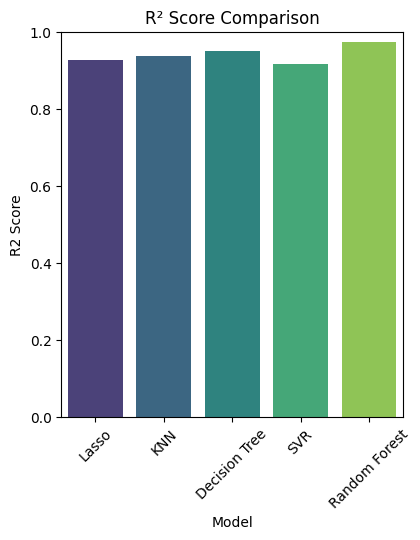

In [376]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create dictionary of results
model_results = {
    'Model': ['Lasso', 'KNN', 'Decision Tree', 'SVR', 'Random Forest'],
    'R2 Score': [0.927538453857948,0.9365686113076417,0.9509498583743491,0.9161009549478853,0.9744555921581622], 
 
}

# Create DataFrame
results_df = pd.DataFrame(model_results)
results_df = results_df.set_index('Model')

# Create visualizations
plt.figure(figsize=(15, 5))

# Plot R2 Scores
plt.subplot(1, 3, 1)
sns.barplot(data=results_df.reset_index(), x='Model', y='R2 Score', palette='viridis')
plt.title('R² Score Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # R2 score typically ranges from 0 to 1




# Print formatted comparison table
print("\nModel Performance Comparison:")
print("-" * 60)
print(results_df.round(4).to_string())
print("-" * 60)

# Find best performing models
best_r2_model = results_df['R2 Score'].idxmax()



print(f"\nBest performing model by R² Score: {best_r2_model}")

